<a href="https://colab.research.google.com/github/aivydebnath/news-scrapping-news-article-using-python/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installation

In [ ]:
!pip install selenium

In [ ]:
!ls /usr/lib/chromium-browser

chromedriver


In [ ]:
# Update and install the latest version of ChromeDriver
!apt-get update
!apt-get install -y chromium-chromedriver

# Check the path of ChromeDriver
!which chromedriver

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,677 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,329 kB]
Fetched 3,125 kB in 3s (1,179 kB/s)
Reading package lists... Done
Reading package 

#Aljazeera

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
from selenium import webdriver

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

chrome_driver_path = '/usr/bin/chromedriver'

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("start-maximized")
chrome_options.add_argument('--verbose')
chrome_options.add_argument('--headless')
chrome_options.binary_location = '/usr/bin/google-chrome'
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver= webdriver.Chrome(options=chrome_options)

# # Initialize the Chrome WebDriver with specified options and executable path


url = "https://www.aljazeera.com/tag/israel-war-on-gaza/"
driver.get(url)

In [ ]:
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup

# driver.maximize_window()

num_clicks = 50

# Loop to click the button multiple times
for _ in range(num_clicks):
    # Wait for the button to be clickable
    show_more_button = driver.find_element(By.CLASS_NAME, 'show-more-button')

    # Scroll into view
    driver.execute_script("arguments[0].scrollIntoView(true);", show_more_button)


    # Click the button
    if show_more_button:
        show_more_button.click()

    driver.implicitly_wait(10)

# Wait for the page to load after clicking "Show More" (you might need to adjust the wait time)
driver.implicitly_wait(10)

# Get the page source after clicking "Show More"
page_source = driver.page_source

soup = BeautifulSoup(page_source, 'html.parser')
# current_month = datetime.now().strftime('%B')  # Get the current month's name

# Find all anchor elements (a tags) on the page
anchor_elements = soup.find_all("a", class_="u-clickable-card__link")

# Extract href attributes from each anchor element
href_links = [element["href"] for element in anchor_elements]

len(href_links)

504

In [ ]:
from datetime import datetime

# Find all anchor elements (a tags) on the page
import re
processed_links = []
for element in anchor_elements:
        # Find the associated footer
        # print("----------------",element["href"])
        link = element["href"]
        if link.startswith("https://interactive.aljazeera.com") or link.startswith("/news/"):

          footer = element.find_next('footer')

          # Define a regex pattern to match the date components
          pattern = re.compile(r'Published On (\d{1,2}) (\w{3}) (\d{4})')

          # Search for the pattern in the text
          match = pattern.search(footer.text)
          if match:
              day, month, year = match.groups()
                  # Convert to a string and create a datetime object
              date_string = f"{day} {month} {year}"
              date_object = datetime.strptime(date_string, "%d %b %Y")
              if date_object.year == datetime.now().year:
                if not (link.startswith("https://aljazeera.com") or link.startswith("https://interactive.aljazeera.com")):
                  link = "https://aljazeera.com" + link
                processed_links.append(link)
          else:
              print("No match found")

In [ ]:
len(processed_links)

248

In [ ]:
import requests
from bs4 import BeautifulSoup as sp

# Iterate over the processed links
for link in processed_links:
    page = requests.get(link)
    bsobj = sp(page.content)

    # Assuming the news content is within a div with class 'wysiwyg wysiwyg--all-content css-ibbk12'
    for news in bsobj.findAll('div', {'class': 'wysiwyg wysiwyg--all-content css-ibbk12'}):
        print(news.text.strip())

Streaming output truncated to the last 5000 lines.
In January 2023, for instance, the newly-formed Israeli government – seen as the most far-right coalition government in the country’s history – decided to withhold $39m in tax revenues from the PA following the authority’s decision to ask the International Court of Justice (ICJ) to rule on the legality of Israel’s decades-long occupation.
“Israeli blackmailing of our tax revenues will not stop us from continuing our political and diplomatic struggle,” said Palestinian Prime Minister Mohammad Shtayyeh at the time after Israel’s security cabinet had earlier described the PA’s ICJ move as a “decision to wage political and legal war against the State of Israel”.
What effect has Israel’s withdrawal of public money had on Palestine?
“The PA owes billions in internal debt to local banks, hospitals, medical companies and the private sector,” said Morrar. “There are also debts [owed], for example, for privately owned buildings rented out by the

In [ ]:
import requests
from bs4 import BeautifulSoup as sp

# Open a file to write the news content
with open("aljazeera_content.txt", "w", encoding="utf-8") as file:

    # Iterate over the processed links
    for link in processed_links:
        page = requests.get(link)
        bsobj = sp(page.content)

        # Assuming the news content is within a div with class 'wysiwyg wysiwyg--all-content css-ibbk12'
        for news in bsobj.findAll('div', {'class': 'wysiwyg wysiwyg--all-content css-ibbk12'}):
            # Write the news content to the file
            file.write(news.text.strip())
            file.write("\n")  # Add a newline for better readability between articles

print("News content has been successfully written to aljazeera_content.txt.")

# Read the content from the generated file
with open("aljazeera_content.txt", "r", encoding="utf-8") as file:
    aljazeera_content = file.read()

# Print or use the news content as needed
print(aljazeera_content)


News content has been successfully written to aljazeera_content.txt.
Yemen’s Houthi militia has stated it plans more attacks on United States and British warships.
The Iran-aligned group’s statement, released on Wednesday, said all US and British warships participating in “aggression” against Yemen are targets. The statement stoked concern over the simmering tensions in the region as well as increased disruption to world trade.Keep reading list of 4 itemslist 1 of 4UK says it thwarted Houthis’ drone attack in the Red Sealist 2 of 4US, UK sanction senior Houthis as rebels say Red Sea attacks will continuelist 3 of 4US and UK carry out new attacks against Yemen’s Houthislist 4 of 4Photos: Yemenis rally for Houthis, Palestinians in Sanaaend of list
The Houthis, who control the most populous parts of Yemen, have launched drones and missiles at shipping in the Red Sea and Gulf of Aden since November 19. The group said the attacks are a response to Israel’s military operations in Gaza.
(Al J

#CNN

In [ ]:
from bs4 import BeautifulSoup as sp
import requests
from datetime import date, timedelta  # Add import statement for timedelta

# Get today's date
today = date.today()

# Define the number of days you want data for (e.g., 30 days for a month)
days_for_month = 30

# Create an empty list to store news data
all_news_data = []

# Iterate over the last 'days_for_month' days
for i in range(days_for_month):
    # Calculate the date for each day
    current_date = today - timedelta(days=i)
    formatted_date = current_date.strftime("%m-%d-%y")

    # Create the CNN URL for the specific date
    cnn_url = "https://edition.cnn.com/middleeast/live-news/israel-hamas-war-gaza-news-{}/index.html".format(formatted_date)

    # Fetch HTML content
    html = requests.get(cnn_url)

    # Create BeautifulSoup object
    bsobj = sp(html.content, 'lxml')

    # Iterate over each news article and append it to the list
    for news in bsobj.findAll('article', {'class': 'sc-bwzfXH sc-eXEjpC iGQwpp'}):
        all_news_data.append(news.text)

# Store all the collected news data in a file
with open("cnn_content.txt", "w", encoding="utf-8") as file:
    for news_data in all_news_data:
        file.write(news_data + "\n")


In [ ]:
with open("cnn_content.txt", "r", encoding="utf-8") as file:
    print(file.read())


45 min agoMore than 180,000 people were forced to move amid heavy fighting in Khan Younis. Here's how it changed an areaFrom CNN's Tim Lister, Gianluca Mezzofiore, Ibrahim Dahman and Amir TalPalestinians migrate to safer areas due to Israeli attacks on Khan Younis, Gaza on January 30. Ahmed Zaqout/Anadolu/Getty ImagesAs the southern Gaza city of Khan Younis is engulfed in intense fighting, 184,000 people have registered for humanitarian assistance after being forced to leave the area in recent days, according to the United Nations Relief and Works Agency for Palestine Refugees in the Near East (UNRWA).“UNRWA along with the people of Khan Younis have fled to the outskirts down closer to the coast,” Tom White, director of UNRWA affairs, said in a video posted on X (formerly Twitter).Satellite images taken by Planet Labs over the last 10 days show that a large cluster of tents set up by displaced people to the west of Khan Younis have now disappeared.Take a look at this area around the Aq

#Business Insider

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import json

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import json

b = {}
i=0
# Assuming filtered_href_values is a list of href values

for idx in range(1, 23): #as it contains one month
    url1 = f"https://www.businessinsider.in/international/news/{idx}"
    source = requests.get(url1).text
    soup = BeautifulSoup(source, 'html.parser')

    # Initialize a list to store text values for the current iteration
    a = []

    # Find the specific script containing the URLs based on context or other attributes
    target_script = None
    for script in soup.find_all('script', {'type': 'application/ld+json'}):
        if '"@type" : "ItemList"' in script.text:
            target_script = script
            break

    if target_script:
        # Extract the JSON-like data
        script_content = target_script.contents[0].strip()

        # Load JSON data
        data = json.loads(script_content)

        # Extract the URLs from the JSON data
        urls = [
            item['url']
            for item in data.get('itemListElement', [])
        ]

        # Print the URLs with their indices
        for index, url in enumerate(urls, start=1):
            print(f"{index}. {url}")
            b[i]=url
            i += 1
    else:
        print("Target script not found.")

Target script not found.
1. https://www.businessinsider.in/international/news/a-woman-in-china-has-decided-to-leave-her-2-8m-fortune-to-her-dogs-and-cats-and-nothing-to-her-children-says-report/articleshow/107209472.cms
2. https://www.businessinsider.in/international/news/us-special-operations-forces-are-searching-for-a-new-extreme-long-range-rifle-for-their-next-big-fight-as-ukraine-shows-the-damage-that-snipers-can-do/articleshow/107208442.cms
3. https://www.businessinsider.in/international/news/i-dont-mind-giving-my-kids-screen-time-but-teaching-them-how-to-find-what-they-want-is-time-consuming-and-frustrating-/articleshow/107207474.cms
4. https://www.businessinsider.in/international/news/kremlin-denies-report-that-putin-reached-out-to-the-us-about-talks-on-ending-the-war-in-ukraine/articleshow/107206371.cms
5. https://www.businessinsider.in/international/news/russia-is-changing-tactics-to-try-to-capture-the-city-of-avdiivka-and-plans-to-fight-through-it-block-by-block-isw-says/arti

In [ ]:
# Filter URLs containing the word "Hamas" (case-insensitive)
filtered_urls = {key: value for key, value in b.items() if 'hamas' in value.lower()}

# Create a new dictionary with consecutive integer keys
filtered_urls_dict = {i + 1: url for i, url in enumerate(filtered_urls.values())}

In [ ]:
# Print the filtered URLs with new keys
for key, value in filtered_urls_dict.items():
    print(f"{key}. {value}")

1. https://www.businessinsider.in/international/news/hamas-inflicted-a-huge-loss-on-israel-killing-21-soldiers-with-a-single-devastating-rpg-shot/articleshow/107089690.cms
2. https://www.businessinsider.in/international/news/israeli-military-leaders-say-israel-has-a-choice-defeat-hamas-or-save-the-hostages/articleshow/107062261.cms
3. https://www.businessinsider.in/international/news/10-year-old-boy-hospitalized-after-being-attacked-by-a-shark-during-a-shark-tank-expedition-in-the-bahamas/articleshow/106913794.cms
4. https://www.businessinsider.in/international/news/photos-show-subdued-christmas-celebrations-in-the-west-bank-town-of-bethlehem-amid-the-israel-hamas-war/slidelist/106800055.cms
5. https://www.businessinsider.in/international/news/hamasapos-oct-7-terror-attacks-left-destruction-in-their-wake-see-photos-of-what-israeli-citizens-left-behind-/slidelist/106786401.cms
6. https://www.businessinsider.in/international/news/the-3000-year-history-of-tunnel-warfare-shows-how-hard-ita

In [ ]:
b = {}

# Assuming filtered_urls_dict is a dictionary with indices as keys and URLs as values

for idx, url in filtered_urls_dict.items():
    # Fetch HTML content
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'html.parser')

    # Initialize a list to store text values for the current iteration
    a = []

    # Find the script tag with the id '__NEXT_DATA__'
    script_tags = soup.find_all('script', type='application/ld+json')
    for script_tag in script_tags:
        try:
            json_data = json.loads(script_tag.string)
            text_data = json_data.get('articleBody', '')

            # Append the "text" values to the list
            if isinstance(text_data, str):
                a.append(text_data)

        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

    # Now, 'a' contains the stored text values for the current iteration
    print(f"Stored Text Values in 'a' for iteration {idx}:")
    for text_value in a:
        b.setdefault(idx, []).append(text_value)


Stored Text Values in 'a' for iteration 1:
Stored Text Values in 'a' for iteration 2:
Stored Text Values in 'a' for iteration 3:
Stored Text Values in 'a' for iteration 4:
Stored Text Values in 'a' for iteration 5:
Stored Text Values in 'a' for iteration 6:
Stored Text Values in 'a' for iteration 7:
Stored Text Values in 'a' for iteration 8:
Stored Text Values in 'a' for iteration 9:
Stored Text Values in 'a' for iteration 10:
Stored Text Values in 'a' for iteration 11:
Stored Text Values in 'a' for iteration 12:
Stored Text Values in 'a' for iteration 13:
Stored Text Values in 'a' for iteration 14:
Stored Text Values in 'a' for iteration 15:
Stored Text Values in 'a' for iteration 16:
Stored Text Values in 'a' for iteration 17:
Stored Text Values in 'a' for iteration 18:
Stored Text Values in 'a' for iteration 19:


In [ ]:
b[1]

['',
 '',
 "Hamas killed 21 Israeli soldiers with a single RPG shot on Monday, an IDF spokesperson said.The shot likely set off explosives the IDF soldiers had laid, the official said, causing a bigger blast.Hamas inflicted a huge loss on Israel on Monday, killing 21 soldiers with a single rocket-propelled grenade, according to an Israeli official.Daniel Hagari, a spokesperson for the Israel Defense Forces, made the statement in a televised address shared by i24News on Tuesday.He said Hamas militants launched an RPG at a tank at about 4 p.m. local time Monday in central Gaza, close to the border community of Kissufim.That likely set off a large explosion of the IDF's own munitions, collapsing two buildings onto the roughly two-dozen soldiers who died, per a translation provided by The Times of Israel.Hagari said that the IDF laid explosives in the buildings, intending to withdraw to a safe distance before detonating them. But the RPG attack hit first.The buildings collapsed due to this

In [ ]:

# Assuming 'b' contains the desired data
with open('bi_content.txt', 'w', encoding='utf-8') as text_file:
    for idx, text_values in b.items():
        #text_file.write(f"Stored Text Values in 'b' for iteration {idx}:\n")
        for text_value in text_values:
            text_file.write(f"{text_value}\n")
        text_file.write("\n")


In [ ]:

# Assuming 'b' contains the desired data
output_file_path = 'bi_content.txt'
with open(output_file_path, 'w', encoding='utf-8') as text_file:
    for idx, text_values in b.items():
        #text_file.write(f"Stored Text Values in 'b' for iteration {idx}:\n")
        for text_value in text_values:
            text_file.write(f"{text_value}\n")
        text_file.write("\n")

# Print the contents of the text file
with open(output_file_path, 'r', encoding='utf-8') as read_file:
    file_contents = read_file.read()
    print(file_contents)




Hamas killed 21 Israeli soldiers with a single RPG shot on Monday, an IDF spokesperson said.The shot likely set off explosives the IDF soldiers had laid, the official said, causing a bigger blast.Hamas inflicted a huge loss on Israel on Monday, killing 21 soldiers with a single rocket-propelled grenade, according to an Israeli official.Daniel Hagari, a spokesperson for the Israel Defense Forces, made the statement in a televised address shared by i24News on Tuesday.He said Hamas militants launched an RPG at a tank at about 4 p.m. local time Monday in central Gaza, close to the border community of Kissufim.That likely set off a large explosion of the IDF's own munitions, collapsing two buildings onto the roughly two-dozen soldiers who died, per a translation provided by The Times of Israel.Hagari said that the IDF laid explosives in the buildings, intending to withdraw to a safe distance before detonating them. But the RPG attack hit first.The buildings collapsed due to this explosion

#NDTV

In [ ]:
pip install requests

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the news website
url = "https://www.ndtv.com/topic/israel-hamas-latest-news"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all div tags with class 'src_itm-ttl'
div_headlines = soup.find_all('div', class_='src_itm-ttl')

# Create a list to store href tags
href_list = []

# Extract href tags and store them in the list
for div_headline in div_headlines:
    href = div_headline.find('a')['href']
    href_list.append(href)

# Print the href tags
with open('href_links.txt', 'w') as file:
    for href in href_list:
        print(href)
        file.write(href + '\n')


https://www.ndtv.com/world-news/as-gaza-death-count-tops-25-000-hamas-admits-to-chaos-that-led-to-war-4907213
https://www.ndtv.com/world-news/fighting-across-gaza-as-israel-drops-leaflets-to-help-locate-its-hostages-4901296
https://www.ndtv.com/india-news/s-jaishankar-palestine-foreign-minister-discuss-ongoing-gaza-war-in-uganda-4899536
https://www.ndtv.com/world-news/israel-pm-netanyahu-promises-victory-over-hamas-as-gaza-war-hits-100-day-mark-4861092
https://www.ndtv.com/world-news/israel-hamas-gaza-palestine-2023-most-violent-year-on-record-for-israeli-settler-attacks-report-4781683
https://www.ndtv.com/world-news/israel-gaza-hamas-palestine-no-place-is-safe-in-gaza-says-un-after-israels-latest-evacuation-order-4729173
https://www.ndtv.com/world-news/israel-gaza-hamas-palestine-hamas-death-count-reaches-nearly-20-000-as-war-rages-gaza-health-ministry-4704462
https://www.ndtv.com/world-news/israel-hamas-gaza-palestine-they-showed-me-off-as-a-trophy-freed-israeli-hostage-on-gaza-capti

In [ ]:
# Iterate through each href link and print the article
for href in href_list:
    article_response = requests.get(href)
    article_soup = BeautifulSoup(article_response.content, 'html.parser')
    article_body = article_soup.find('div', class_='sp-cn ins_storybody').get_text()
    print(article_body)


The Hamas report rejected any international and Israeli efforts to decide Gaza's post-war futureGaza: Palestinian group Hamas on Sunday defended its October 7 attacks against Israel but admitted to "faults" and called for an end to "Israeli aggression" in Gaza, where the health ministry said the death count passed 25,000.Southern Gaza is the latest focus of Israel's battle to destroy the Islamist group responsible for the deadliest attack in the country's history.In its first public report on the attacks that began the war, Hamas said they were a "necessary step" against Israeli occupation of Palestinian territories, and a way to secure release of Palestinian prisoners.Israeli Prime Minister Benjamin Netanyahu later vowed "complete victory" and said his government would not accept Hamas's conditions for releasing hostages still held in Gaza.Hamas's 16-page report admitted "some faults happened... due to the rapid collapse of the Israeli security and military system, and the chaos cause

In [ ]:
# Print the href tags to a file named 'ndtv.txt'
with open('ndtv_content.txt', 'w') as file:
    for href in href_list:
        file.write(href + '\n')

    # Iterate through each href link and print the article
    for href in href_list:
        article_response = requests.get(href)
        article_soup = BeautifulSoup(article_response.content, 'html.parser')
        article_body = article_soup.find('div', class_='sp-cn ins_storybody').get_text()
        file.write(article_body + '\n\n')

In [ ]:
# Read and print the content of the 'ndtv.txt' file
with open('ndtv_content.txt', 'r') as file:
    content = file.read()
    print(content)


https://www.ndtv.com/world-news/as-gaza-death-count-tops-25-000-hamas-admits-to-chaos-that-led-to-war-4907213
https://www.ndtv.com/world-news/fighting-across-gaza-as-israel-drops-leaflets-to-help-locate-its-hostages-4901296
https://www.ndtv.com/india-news/s-jaishankar-palestine-foreign-minister-discuss-ongoing-gaza-war-in-uganda-4899536
https://www.ndtv.com/world-news/israel-pm-netanyahu-promises-victory-over-hamas-as-gaza-war-hits-100-day-mark-4861092
https://www.ndtv.com/world-news/israel-hamas-gaza-palestine-2023-most-violent-year-on-record-for-israeli-settler-attacks-report-4781683
https://www.ndtv.com/world-news/israel-gaza-hamas-palestine-no-place-is-safe-in-gaza-says-un-after-israels-latest-evacuation-order-4729173
https://www.ndtv.com/world-news/israel-gaza-hamas-palestine-hamas-death-count-reaches-nearly-20-000-as-war-rages-gaza-health-ministry-4704462
https://www.ndtv.com/world-news/israel-hamas-gaza-palestine-they-showed-me-off-as-a-trophy-freed-israeli-hostage-on-gaza-capti

In [ ]:
# Read the content of the 'ndtv.txt' file and modify it in-place
with open('ndtv_content.txt', 'r') as file:
    lines = file.readlines()

# Remove lines starting with "https://www.ndtv.com/"
lines = [line for line in lines if not line.strip().startswith("https://www.ndtv.com/")]

# Write the modified content back to the 'ndtv.txt' file
with open('ndtv_content.txt', 'w') as file:
    file.writelines(lines)


In [ ]:
# Read and print the content of the 'ndtv.txt' file
with open('ndtv_content.txt', 'r') as file:
    content = file.read()
    print(content)


The Hamas report rejected any international and Israeli efforts to decide Gaza's post-war futureGaza: Palestinian group Hamas on Sunday defended its October 7 attacks against Israel but admitted to "faults" and called for an end to "Israeli aggression" in Gaza, where the health ministry said the death count passed 25,000.Southern Gaza is the latest focus of Israel's battle to destroy the Islamist group responsible for the deadliest attack in the country's history.In its first public report on the attacks that began the war, Hamas said they were a "necessary step" against Israeli occupation of Palestinian territories, and a way to secure release of Palestinian prisoners.Israeli Prime Minister Benjamin Netanyahu later vowed "complete victory" and said his government would not accept Hamas's conditions for releasing hostages still held in Gaza.Hamas's 16-page report admitted "some faults happened... due to the rapid collapse of the Israeli security and military system, and the chaos cause

#Republic TV

In [ ]:
import requests
from bs4 import BeautifulSoup

# The URL of the website
url = "https://www.republicworld.com/world-news/israel-hamas-war-live-palestine-gaza-strip/"

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Find the label with the specified class
label = soup.find('label', {'class': 'tabLabel', 'for': 'chck6548ccb63651668a1d72c5f2'})

# Check if the label is found
if label:
    # Get the text content of the associated article
    article_text = label.find_next('p').get_text()

    # Export the text to a file
    with open('extracted_article.txt', 'w', encoding='utf-8') as file:
        file.write(article_text)
        print("Article extracted and saved to 'extracted_article.txt'")
else:
    print("Label not found.")


Article extracted and saved to 'extracted_article.txt'


In [ ]:
# Read and print the content of the 'ndtv.txt' file
with open('extracted_article.txt', 'r') as file:
    content = file.read()
    print(content)

As the IDF continues to advance with its military operation in Gaza, spokesperson Col. Peter Lerner told CNN that the north and south of the strip have been cut off from one another. “The north and south (of Gaza) have been cut off from one another and are under IDF control,” Lt. Col. Peter Lerner told CNN on Monday. "This indeed means that we are pushing forward towards Gaza City, we have encircled Gaza City two days ago and we are moving forward," Lerner added. Describing Gaza City as “the fortress of Hamas’s terrorist activities,” he said the IDF is determined and wants to destroy the militant group.


In [ ]:
import requests
from bs4 import BeautifulSoup

# The URL of the website
url = "https://www.republicworld.com/world-news/israel-hamas-war-live-palestine-gaza-strip/"

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Find all labels with the specified class
labels = soup.find_all('label', class_='tabLabel')

# Initialize a list to store article texts
article_texts = []

# Loop through each label
for label in labels:
    # Get the text content of the associated article
    article_text = label.find_next('p').get_text()

    # Append the article text to the list
    article_texts.append(article_text)

# Export all article texts to a text file
with open('republic_content.txt', 'w', encoding='utf-8') as file:
    for idx, article_text in enumerate(article_texts, start=1):
        file.write(f"{article_text}\n")

print(f"All articles extracted and saved to 'republic_content.txt'")


All articles extracted and saved to 'republic_content.txt'


In [ ]:
# Read and print the content of the 'ndtv.txt' file
with open('republic_content.txt', 'r') as file:
    content = file.read()
    print(content)

As the IDF continues to advance with its military operation in Gaza, spokesperson Col. Peter Lerner told CNN that the north and south of the strip have been cut off from one another. “The north and south (of Gaza) have been cut off from one another and are under IDF control,” Lt. Col. Peter Lerner told CNN on Monday. "This indeed means that we are pushing forward towards Gaza City, we have encircled Gaza City two days ago and we are moving forward," Lerner added. Describing Gaza City as “the fortress of Hamas’s terrorist activities,” he said the IDF is determined and wants to destroy the militant group.
After finishing his talks in Turkey, US Secretary of State Antony Blinken is headed to Asia where the Gaza conflict will likely share top billing with other international crises at a series of events in Japan, South Korea and India, including Russia’s war on Ukraine and North Korea’s nuclear weapons program.
US Secretary of State Antony Blinken is wrapping up a grueling Middle East dipl

#Summery

In [ ]:
!pip install nltk
!pip install wordcloud

In [ ]:
# Function to extract text content from BBC, CNN, and Al Jazeera files
def extract_content(file_path, news_source):
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read()

        if news_source == "Al Jazeera":
            # Assuming the news content is within a div with class 'wysiwyg wysiwyg--all-content css-ibbk12'
            bsobj = BeautifulSoup(content, "html.parser")
            news_content = "\n".join(news.text.strip() for news in bsobj.findAll('div', {'class': 'wysiwyg wysiwyg--all-content css-ibbk12'}))
        else:
            news_content = content

        return news_content


In [ ]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Sentiment Score for Al Jazeera: 0.027678698529813188
Top Keywords for Al Jazeera: [('gaza', 1777), ('israel', 1759), ('israeli', 1177), ('war', 835), ('us', 788), ('palestinian', 637), ('hamas', 552), ('killed', 516), ('list', 514), ('people', 508), ('attacks', 481), ('military', 464), ('also', 438), ('al', 411), ('jazeera', 411)]


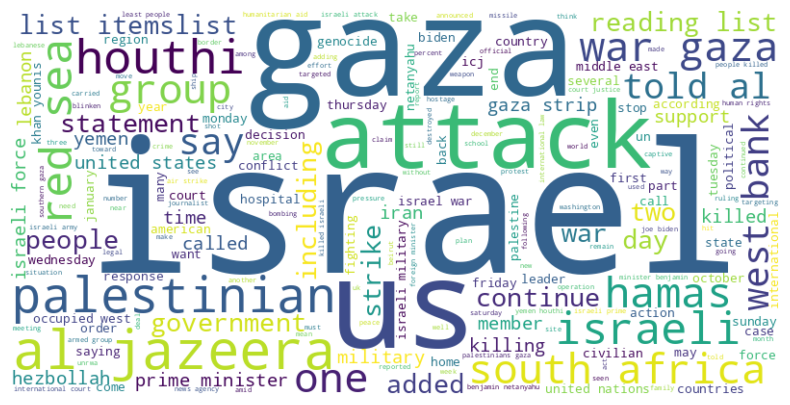


Sentiment Score for CNN: 0.01811006539756538
Top Keywords for CNN: [('gaza', 650), ('israel', 585), ('us', 406), ('israeli', 383), ('cnn', 372), ('hamas', 314), ('january', 307), ('link', 252), ('et', 236), ('war', 221), ('military', 201), ('palestinian', 191), ('people', 174), ('attacks', 166), ('minister', 163)]


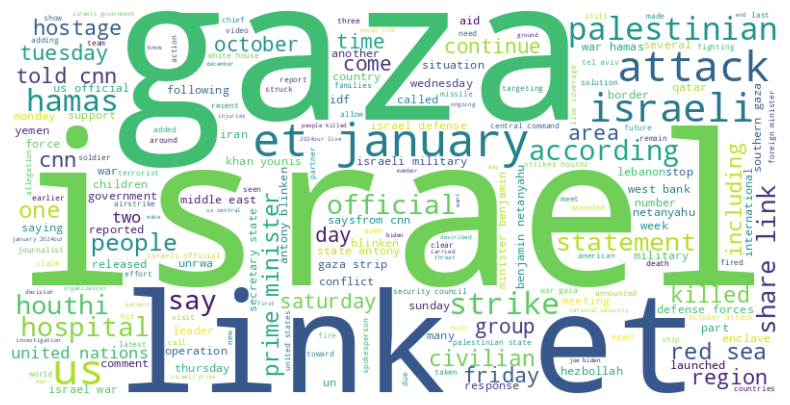

In [ ]:
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function for sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Function for keyword extraction using NLTK
def extract_keywords(text, num_keywords=15):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)

    # Remove the word 'said' and additional words from the list of words
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words and word.lower() not in ['said', 'facebookshare', 'twittershare', 'emailshare']]

    freq_dist = nltk.FreqDist(words)
    return freq_dist.most_common(num_keywords)

# Function for generating word cloud
def generate_wordcloud(text, exclude_words=None):
    if exclude_words is None:
        exclude_words = []

    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)

    # Remove stop words and additional excluded words
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words and word.lower() not in exclude_words]

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Function to read content from a file
def read_content(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read()
    return content

# Example for Al Jazeera
aljazeera_content = read_content("aljazeera_content.txt")

# Analyze sentiment
sentiment_score = analyze_sentiment(aljazeera_content)
print(f"Sentiment Score for Al Jazeera: {sentiment_score}")

# Extract keywords
keywords = extract_keywords(aljazeera_content, num_keywords=15)
print(f"Top Keywords for Al Jazeera: {keywords}")

# Generate word cloud (exclude 'said' from the word cloud)
generate_wordcloud(aljazeera_content, exclude_words=['said', 'facebookshare', 'twittershare', 'emailshare'])

# Example for CNN
cnn_content = read_content("cnn_content.txt")

# Analyze sentiment
sentiment_score = analyze_sentiment(cnn_content)
print(f"\nSentiment Score for CNN: {sentiment_score}")

# Extract keywords
keywords = extract_keywords(cnn_content, num_keywords=15)
print(f"Top Keywords for CNN: {keywords}")

# Generate word cloud (exclude 'said', 'facebookshare', 'twittershare', 'emailshare' from the word cloud)
generate_wordcloud(cnn_content, exclude_words=['said', 'facebookshare', 'twittershare', 'emailshare'])



Sentiment Score for Business Insider: 0.03884387722610145
Top Keywords for Business Insider: [('hamas', 80), ('israel', 68), ('israeli', 62), ('gaza', 45), ('idf', 40), ('tunnels', 37), ('war', 34), ('killed', 32), ('tanks', 30), ('times', 26), ('october', 25), ('military', 25), ('soldiers', 24), ('new', 23), ('attacks', 22)]


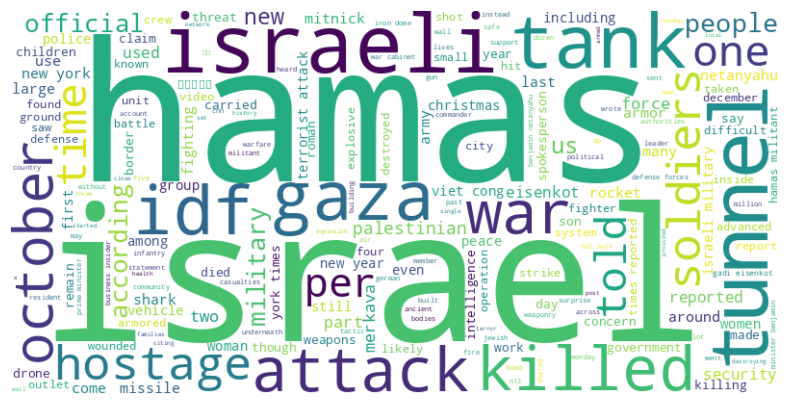


Sentiment Score for NDTV: 0.0689096720192778
Top Keywords for NDTV: [('gaza', 180), ('israel', 124), ('palestinian', 120), ('israeli', 112), ('hamas', 90), ('people', 88), ('killed', 66), ('war', 58), ('palestinians', 50), ('latest', 44), ('hostages', 44), ('would', 42), ('west', 40), ('according', 38), ('attacks', 36)]


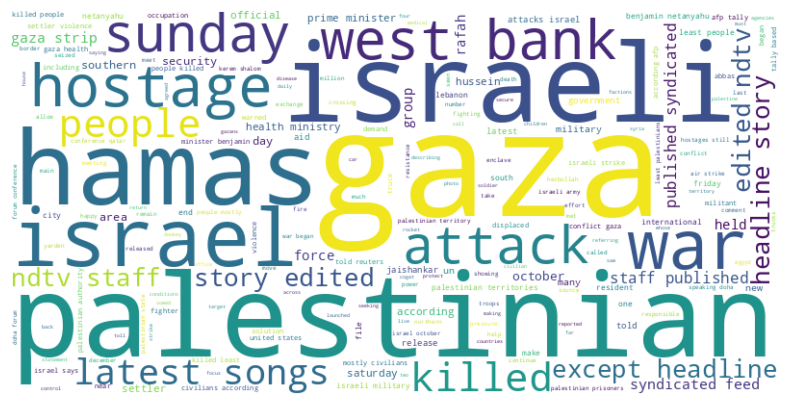


Sentiment Score for Rebuplic World: 0.033577891043603446
Top Keywords for Rebuplic World: [('israel', 950), ('hamas', 764), ('gaza', 752), ('israeli', 515), ('idf', 402), ('war', 279), ('us', 264), ('minister', 255), ('president', 220), ('people', 218), ('strip', 197), ('terrorist', 183), ('forces', 166), ('prime', 164), ('killed', 164)]


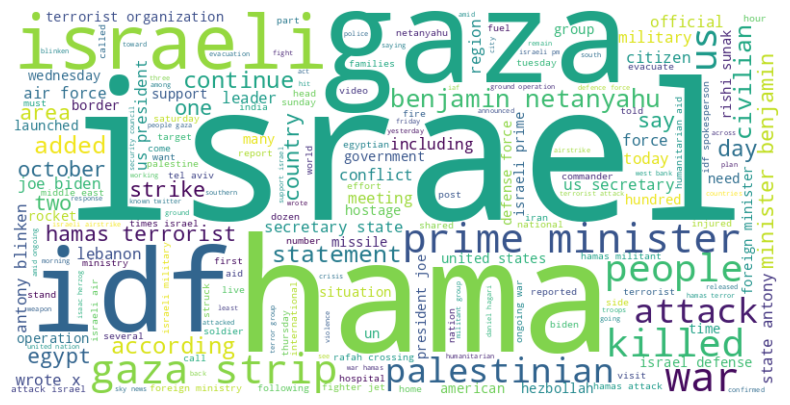

In [ ]:
# Example for Business Insider
bi_content = read_content("bi_content.txt")

# Analyze sentiment
sentiment_score = analyze_sentiment(bi_content)
print(f"\nSentiment Score for Business Insider: {sentiment_score}")

# Extract keywords
keywords = extract_keywords(bi_content)
print(f"Top Keywords for Business Insider: {keywords}")

# Generate word cloud (exclude 'said' from the word cloud)
generate_wordcloud(bi_content, exclude_words=['said'])

# Example for NDTV
ndtv_content = read_content("ndtv_content.txt")

# Analyze sentiment
sentiment_score = analyze_sentiment(ndtv_content)
print(f"\nSentiment Score for NDTV: {sentiment_score}")

# Extract keywords
keywords = extract_keywords(ndtv_content)
print(f"Top Keywords for NDTV: {keywords}")

# Generate word cloud (exclude 'said' from the word cloud)
generate_wordcloud(ndtv_content, exclude_words=['said'])

# Example for Republic World
republic_content = read_content("republic_content.txt")

# Analyze sentiment
sentiment_score = analyze_sentiment(republic_content)
print(f"\nSentiment Score for Rebuplic World: {sentiment_score}")

# Extract keywords
keywords = extract_keywords(republic_content)
print(f"Top Keywords for Rebuplic World: {keywords}")

# Generate word cloud (exclude 'said' from the word cloud)
generate_wordcloud(republic_content, exclude_words=['said'])

In [ ]:
# List of file names
file_names = ["aljazeera_content.txt", "cnn_content.txt", "bi_content.txt", "ndtv_content.txt", "republic_content.txt"]

# Output file name
output_file = "all_content.txt"

# Open the output file in write mode
with open(output_file, 'w', encoding='utf-8') as merged_file:
    # Iterate over each file name in the list
    for file_name in file_names:
        # Read the content from the current file
        with open(file_name, 'r', encoding='utf-8') as current_file:
            file_content = current_file.read()

            # Write the content to the merged file
            merged_file.write(file_content)
            merged_file.write("\n\n")  # Add a separator between the contents of different files

print(f"Content has been successfully merged and saved to {output_file}.")


Content has been successfully merged and saved to all_content.txt.


In [ ]:
# Output file name
output_file = "all_content.txt"

# Read the content from the merged file
with open(output_file, 'r', encoding='utf-8') as merged_file:
    merged_content = merged_file.read()

# Print the merged content
print(merged_content)


Yemen’s Houthi militia has stated it plans more attacks on United States and British warships.
The Iran-aligned group’s statement, released on Wednesday, said all US and British warships participating in “aggression” against Yemen are targets. The statement stoked concern over the simmering tensions in the region as well as increased disruption to world trade.Keep reading list of 4 itemslist 1 of 4UK says it thwarted Houthis’ drone attack in the Red Sealist 2 of 4US, UK sanction senior Houthis as rebels say Red Sea attacks will continuelist 3 of 4US and UK carry out new attacks against Yemen’s Houthislist 4 of 4Photos: Yemenis rally for Houthis, Palestinians in Sanaaend of list
The Houthis, who control the most populous parts of Yemen, have launched drones and missiles at shipping in the Red Sea and Gulf of Aden since November 19. The group said the attacks are a response to Israel’s military operations in Gaza.
(Al Jazeera)
The US and Britain have struck back at Houthi targets in Yeme

In [ ]:
!pip install gensim

In [ ]:
from gensim import corpora, models
from pprint import pprint

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

[(0,
  '0.026*"us" + 0.017*"israel" + 0.015*"said" + 0.015*"attacks" + 0.013*"red" '
  '+ 0.013*"houthis" + 0.012*"sea" + 0.011*"yemen" + 0.011*"houthi" + '
  '0.011*"international"'),
 (1,
  '0.031*"israeli" + 0.025*"gaza" + 0.024*"hamas" + 0.019*"idf" + '
  '0.019*"killed" + 0.016*"israel" + 0.015*"said" + 0.013*"forces" + '
  '0.012*"military" + 0.011*"attack"'),
 (2,
  '0.038*"gaza" + 0.025*"israel" + 0.021*"said" + 0.017*"people" + '
  '0.011*"humanitarian" + 0.011*"palestinian" + 0.009*"aid" + 0.007*"ministry" '
  '+ 0.007*"un" + 0.007*"war"'),
 (3,
  '0.022*"said" + 0.015*"told" + 0.014*"al" + 0.013*"israel" + 0.012*"jazeera" '
  '+ 0.010*"war" + 0.008*"hostages" + 0.008*"one" + 0.007*"hamas" + '
  '0.007*"would"'),
 (4,
  '0.035*"israel" + 0.022*"hamas" + 0.020*"minister" + 0.017*"said" + '
  '0.017*"us" + 0.016*"israeli" + 0.014*"netanyahu" + 0.014*"president" + '
  '0.012*"prime" + 0.012*"state"')]


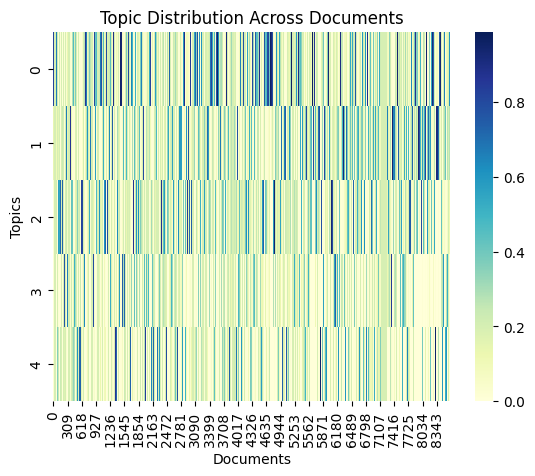

Streaming output truncated to the last 5000 lines.
Document 3631 is most associated with Topic 0 with Probability: 0.49
Document 3632 is most associated with Topic 4 with Probability: 0.41
Document 3633 is most associated with Topic 0 with Probability: 0.48
Document 3634 is most associated with Topic 2 with Probability: 0.76
Document 3635 is most associated with Topic 1 with Probability: 0.46
Document 3636 is most associated with Topic 1 with Probability: 0.67
Document 3637 is most associated with Topic 0 with Probability: 0.50
Document 3638 is most associated with Topic 2 with Probability: 0.34
Document 3639 is most associated with Topic 3 with Probability: 0.41
Document 3640 is most associated with Topic 3 with Probability: 0.35
Document 3641 is most associated with Topic 4 with Probability: 0.48
Document 3642 is most associated with Topic 4 with Probability: 0.70
Document 3643 is most associated with Topic 2 with Probability: 0.42
Document 3644 is most associated with Topic 1 with P

In [ ]:
from gensim import corpora, models
from pprint import pprint
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read content from the file
with open("all_content.txt", "r", encoding="utf-8") as file:
    content = file.read()

# Tokenize and preprocess documents
stop_words = set(stopwords.words('english'))
documents_tokenized = [word_tokenize(doc.lower()) for doc in content.split('\n')]
documents_tokenized = [' '.join([word for word in doc if word.isalnum() and word not in stop_words]) for doc in documents_tokenized]

documents_tokenized = [word_tokenize(doc.lower()) for doc in content.split('\n')]
documents_tokenized = [[word for word in doc if word.isalnum() and word not in stop_words] for doc in documents_tokenized]


# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in documents_tokenized]

# Train LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)


# Print topics and their most representative words
pprint(lda_model.print_topics())

# Visualize topic distribution across documents
document_topic_distribution = []

for doc in corpus:
    topics = lda_model.get_document_topics(doc)
    document_topic_distribution.append(topics)

topic_df = pd.DataFrame(document_topic_distribution).fillna(0)
topic_df = topic_df.applymap(lambda x: x[1] if isinstance(x, tuple) else x)
topic_transposed = topic_df.T

sns.heatmap(topic_transposed, cmap="YlGnBu", annot=False)
plt.xlabel("Documents")
plt.ylabel("Topics")
plt.title("Topic Distribution Across Documents")
plt.show()

# Document association with topics along with probabilities
dominant_topics = []

for doc_id, topics in enumerate(document_topic_distribution):
    max_topic = max(topics, key=lambda x: x[1])
    dominant_topics.append((doc_id, max_topic))

for doc_id, dominant_topic in dominant_topics:
    print(f"Document {doc_id} is most associated with Topic {dominant_topic[0]} with Probability: {dominant_topic[1]:.2f}")

# Coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=documents_tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_lda:.4f}")



In [ ]:
# Apply LSA
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([" ".join(doc) for doc in documents_tokenized])

# Create LSA model
num_topics_lsa = 5  # Choose the number of topics
lsa_model = TruncatedSVD(n_components=num_topics_lsa)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

# Display top terms for each topic
terms = tfidf_vectorizer.get_feature_names_out()

for i, topic in enumerate(lsa_model.components_):
    top_terms = [terms[idx] for idx in topic.argsort()[-10:][::-1]]  # Top 10 terms
    print(f"Top words for Topic {i + 1}: {', '.join(top_terms)}")


Top words for Topic 1: gaza, israel, said, israeli, hamas, war, us, killed, people, palestinian
Top words for Topic 2: us, sea, red, houthis, yemen, houthi, attacks, united, strikes, shipping
Top words for Topic 3: israel, africa, south, court, genocide, icj, case, international, justice, measures
Top words for Topic 4: jazeera, al, told, west, bank, occupied, reporting, raids, diplomacy, east
Top words for Topic 5: minister, netanyahu, prime, hamas, benjamin, blinken, us, state, president, said


In [ ]:
from gensim.models import Word2Vec

# Word2Vec model
model_w2v = Word2Vec(documents_tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Finding similar words for the term 'war'
similar_words = model_w2v.wv.most_similar('war', topn=10)

print(f"Similar words for 'war': {similar_words}\n")


Similar words for 'war': [('end', 0.9412906169891357), ('coverage', 0.9366362690925598), ('ends', 0.9330378174781799), ('beginning', 0.930225670337677), ('israel', 0.9295627474784851), ('2024our', 0.9295593500137329), ('relentless', 0.9280794858932495), ('start', 0.9260655641555786), ('2024blinken', 0.9239427447319031), ('miss', 0.9150664806365967)]



In [ ]:
# Word2Vec model
model_w2v = Word2Vec(documents_tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Finding similar words for the term 'israel'
similar_words = model_w2v.wv.most_similar('israel', topn=10)

print(f"Similar words for 'israel': {similar_words}\n")

Similar words for 'israel': [('accused', 0.9514134526252747), ('stopped', 0.9498770833015442), ('wage', 0.9481208920478821), ('would', 0.9439706206321716), ('first', 0.9420907497406006), ('prior', 0.9399115443229675), ('campaign', 0.9392017722129822), ('unequivocal', 0.937739372253418), ('blaming', 0.9364649057388306), ('stop', 0.9355601668357849)]



In [ ]:
# Word2Vec model
model_w2v = Word2Vec(documents_tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Finding similar words for the term 'hamas'
similar_words = model_w2v.wv.most_similar('hamas', topn=10)

print(f"Similar words for 'hamas': {similar_words}\n")

Similar words for 'hamas': [('appalling', 0.9825294017791748), ('began', 0.9806414246559143), ('escalated', 0.9758937358856201), ('start', 0.9747642874717712), ('surprise', 0.9741843342781067), ('since', 0.9741394519805908), ('unprecedented', 0.9711184501647949), ('assault', 0.9704062342643738), ('offensive', 0.970011830329895), ('captive', 0.9678309559822083)]



In [ ]:
# Word2Vec model
model_w2v = Word2Vec(documents_tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Finding similar words for the term 'conflict'
similar_words = model_w2v.wv.most_similar('conflict', topn=10)

print(f"Similar words for 'conflict': {similar_words}\n")

Similar words for 'conflict': [('long', 0.9940078258514404), ('harm', 0.9929670691490173), ('crime', 0.9925267696380615), ('see', 0.9924402236938477), ('critical', 0.992396891117096), ('broader', 0.9921441674232483), ('influence', 0.9920743703842163), ('wider', 0.9919541478157043), ('fears', 0.99188232421875), ('ways', 0.9917892813682556)]

